In [2]:
import pandas as pd

df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [4]:
df.shape

(215, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [7]:
df.drop('sl_no', axis=1, inplace=True)

In [8]:
df['salary'].fillna(0, inplace=True)

/tmp/ipython-input-412519169.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(0, inplace=True)


In [9]:
df.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


In [10]:
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

In [11]:
df['workex'] = df['workex'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


In [12]:
df['status'].value_counts()

,count
status,
1,148
0,67


In [13]:
df['status'].value_counts(normalize=True) * 100

,proportion
status,
1,68.837209
0,31.162791


In [14]:
df.groupby('status')['mba_p'].mean()

,mba_p
status,
0,61.612836
1,62.579392


In [15]:
df.groupby('workex')['status'].mean()

,status
workex,
0,0.595745
1,0.864865


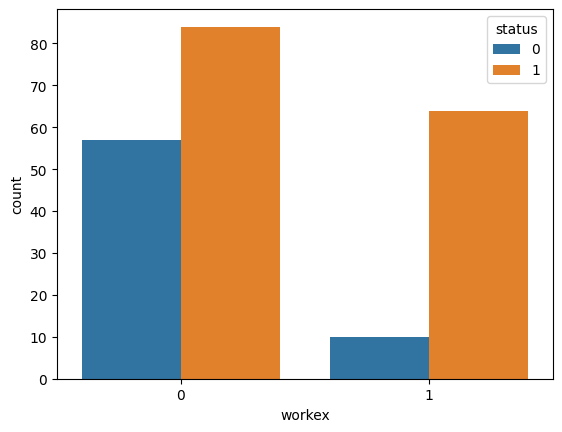

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='workex', hue='status', data=df)
plt.show()

In [17]:
df.groupby('status')[['ssc_p','hsc_p','degree_p','mba_p']].mean()

,ssc_p,hsc_p,degree_p,mba_p
status,,,,
0,57.544030,58.395522,61.134179,61.612836
1,71.721486,69.926554,68.740541,62.579392


In [18]:
df.groupby('status')['etest_p'].mean()

,etest_p
status,
0,69.587910
1,73.238041


In [19]:
df['skill_score'] = (
    df['etest_p'] * 0.4 +
    df['mba_p'] * 0.4 +
    df['workex'] * 20
)

In [20]:
df.groupby('status')['skill_score'].mean()

,skill_score
status,
0,55.465373
1,62.975622


In [21]:
X = df[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p', 'workex']]
y = df['status']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[ 8,  4],
       [ 3, 28]])

In [25]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

importance

,Feature,Coefficient
5,workex,1.300015
0,ssc_p,0.200893
2,degree_p,0.168444
1,hsc_p,0.128784
4,etest_p,-0.012152
3,mba_p,-0.212691


In [26]:
df['predicted_status'] = model.predict(X)

In [27]:
df['status_label'] = df['status'].map({1: 'Placed', 0: 'Not Placed'})
df['predicted_label'] = df['predicted_status'].map({1: 'Placed', 0: 'Not Placed'})


In [28]:
df.to_csv("student_placement_powerbi.csv", index=False)